# Принятие решений в бизнесе на основе данных

***План работ***

**Часть 1. Подготовка данных к анализу**

- Загрузить данные из таблиц, провести первичный анализ
- Оптимизировать данные для анализа (поиск дублей, анализ пропусков, проверка названий столбцов и т.п.)
- Проверка/корректировка типов данных

**Часть 2. Приоритизация гипотез.**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 3. Анализ A/B-теста**

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

**Часть 4. Вывод**
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

#####  Подготовка данных к анализу. Изучение данных из файла и предобработка

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [2]:
# чтение файла с данными и расширение отображения ячеек таблицы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 150) 

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# функция для первичного анализа
def description(x):
    display('Получение общей информации о данных в таблице')
    display(x.info())
    display('Подсчёт пропусков в таблице')
    display(x.isna().sum())
    display('Статистические показатели таблицы')
    display(x.describe())
    display('Количество строк и столбцов')
    display(x.shape)
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())    

In [4]:
description(hypothesis)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'Подсчёт пропусков в таблице'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Статистические показатели таблицы'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Количество строк и столбцов'

(9, 5)

'Наличие дубликатов в таблице'

0

In [5]:
# преобразование названий столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

***Вывод:***
В таблице 'hypothesis' содержатся 9 гипотез со следующими колонками:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [6]:
# чтение файлов с данными
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
# чтение файлов с данными
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
description(orders)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Подсчёт пропусков в таблице'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Статистические показатели таблицы'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Количество строк и столбцов'

(1197, 5)

'Наличие дубликатов в таблице'

0

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
description(visitors)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Подсчёт пропусков в таблице'

date        0
group       0
visitors    0
dtype: int64

'Статистические показатели таблицы'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Количество строк и столбцов'

(62, 3)

'Наличие дубликатов в таблице'

0

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Предварительно изучим количество заказов и уникальных пользователей в каждой из групп.

In [12]:
# общее количество заказов в двух группах
orders.groupby('group').agg({'transactionId' : 'count'})

,transactionId
group,
A,557
B,640


In [13]:
# общее количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


In [14]:
# количество уникальных пользователей, которые оказались одновременно в двух группах
unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors.visitorId.duplicated().sum()

58

**Вывод**

В таблице 'orders', имеющей 1197 строк, содержатся следующие колонки:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

В таблице 'visitors', имеющей 62 строки, содержатся следующие колонки:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Анализ общей информации о данных в таблицах показал, что данные в колонках с датами имеют тип "object". В связи с чем они были преобразованы в "datetime64".

В таблице orders минимальная выручка заказа составил 50 ед., максимальная - 1 294 500 ед. Средняя выручка - 8 348,01 ед., медиана - 2 978 ед.

В таблице visitors количество пользователей за день в группе A/B-теста варьировалось от 361 до 770. Среднее число - 607,29, медиана - 624,5.

Минимальная и максимальная дата в двух таблицах совпадает - 1 августа 2019 г. и 31 августа 2019 г. соответственно. Эти даты нужны будут для построения графиков.

Дубликаты в таблицах не выявлены.

Общее количество заказов в группах не совпадает. В группе А зафиксировано 557 заказов, в группе В - 640. Сравнение уникальных пользователей также выявило различия. В группе В на 83 уникальных пользователя больше. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно. Количество пользователей в различных группах не должно превышать 1% для успешного проведения теста. Некорректное деление трафика теста влияет на качество анализа.

##### Приоритизация гипотез

###### Применение фреймворка ICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [15]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


###### Применение фреймворка RICE для приоритизации гипотез. Сортировка по убыванию приоритета.

In [16]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

Наиболее перспективные гипотезы по ICE:

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Наиболее перспективные гипотезы по RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

Поскольку RICE включает в себя еще один параметр ('Reach'), то именно он оказал влияние на перестановку гипотез по степени приоритетности.

Первая пятерка гипотез совпадает у ICE и RICE, но в разной последовательности. Занявшая по ICE первое место гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место по RICE, т.к. охват у нее оказался самым низким - всего 1 балл. Это вполне логично, т.к. данная акция доступна пользователям раз в год, что существенно сужает возможности ее применения.

При этом гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место, т.к. затрагивает практически всех пользователей. Гипотеза по охвату набрала 10 баллов.

Гипотезы фреймворка RICE, набравшие наибольшее количество баллов, являются наиболее приоритетными. Именно их рекомендуется использовать при проведении A/B-теста.

##### Анализ A/B-теста

###### Создание графика кумулятивной выручки по группам

In [17]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders; удаление дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()


ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', # дата
            'group': 'max', # группа A/B-теста
            'transactionId': 'nunique', # число уникальных заказов в группе теста по указанную дату включительно
            'visitorId': 'nunique', # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста
            'revenue': 'sum', # суммарная выручка заказов в группе теста по указанную дату включительно
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) # сортировка по столбцам 'date', 'group'


visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# определение переменной по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присвоение столбцам cumulativeData названия
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# переменная с данными о датах, выручке и числе заказов в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# переменная с данными о датах, выручке и числе заказов в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

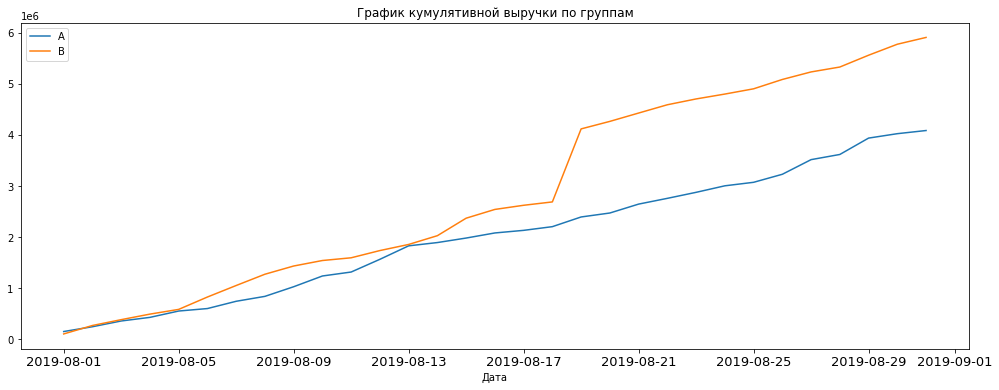

In [18]:
# график кумулятивной выручки по группам
plt.figure(figsize=(17, 6))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси x

plt.tick_params(axis='x', which='major', labelsize=13)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.legend();

Сегмент В с минимальным отрывом лидировал практически весь тест, а в определенные дни был на одном уровне с сегментом А. Но с 18 августа выручка у сегмента В резко подскочила вверх, по-видимому, количество заказов и/или очень дорогих товаров в заказах у данного сегмента значительно выросло. Выручка сегмента А росла практически равномерно весь месяц.

###### Создание графика кумулятивного среднего чека по группам

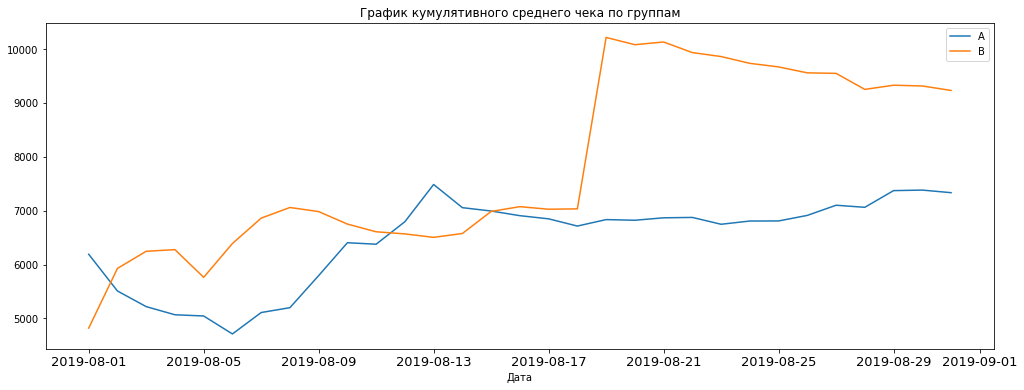

In [19]:
plt.figure(figsize=(17, 6))
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=13)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.legend();

Кумулятивное значение среднего чека к середине месяца выросло по двум сегментам, а затем немного снизилось. В сегменте А, в отличие от сегмента В, к концу месяца средний чек почти сравнялся с максимальным значением, достигнутым 13 августа. Но наиболее примечательно то, что 18 - 19 августа у сегмента В выявлен аномальный рост среднего чека. Скорее всего, были чрезмерно крупные заказы, которые могут влиять на результаты.

###### Создание графика относительного изменения кумулятивного среднего чека группы B к группе A

Text(0.5, 0, 'Дата')

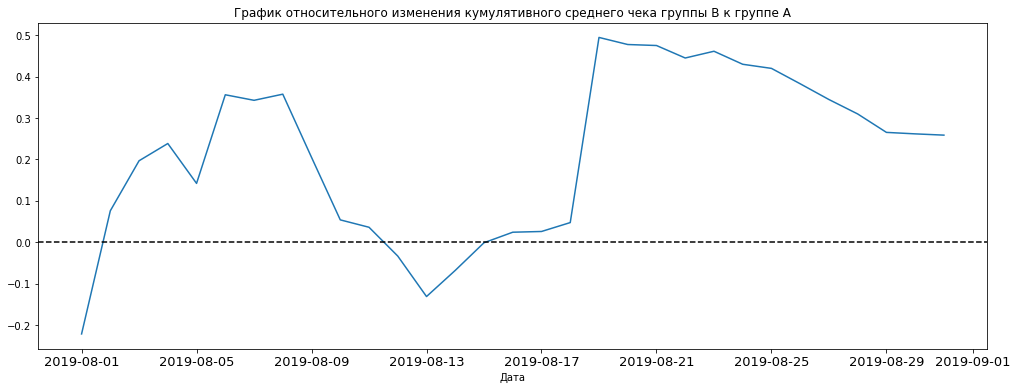

In [20]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])

plt.figure(figsize=(17, 6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=13)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

Результаты теста значительно и резко менялись в несколько дат. В одну из дат как раз и были совершены аномальные заказы сегментом В.

###### Создание графика кумулятивной конверсии по группам

Text(0.5, 0, 'Дата')

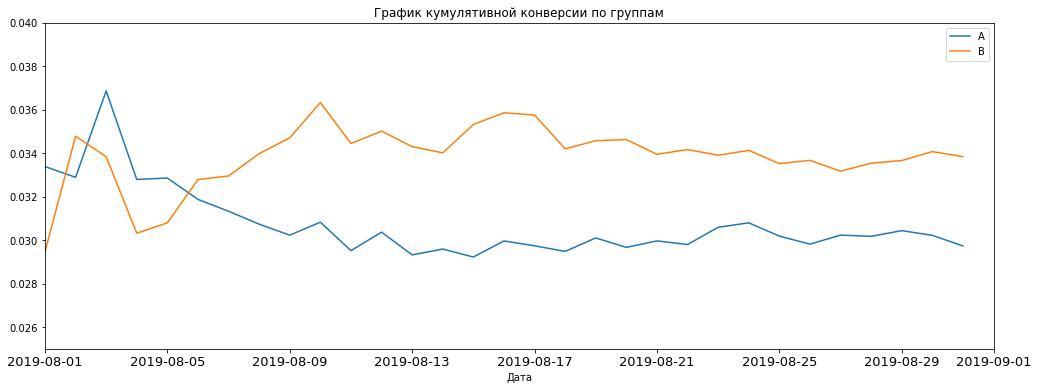

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(17, 6))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=13)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')

Абсолютное значение колебания варьируется в небольшом диапазоне - от 2,9% до 3,7%. В начале конверсия у сегмента В была больше сегмента А, но затем конверсия сегмента В немного выросла, а сегмента А снизилась. К 11 августу конверсия у обоих сегментов зафиксировалась и оставалась примерно на одном уровне до конца месяца. В целом, конверсия у группы В оказалась лучше группы А.

###### Создание графика относительного изменения кумулятивной конверсии группы B к группе A

Text(0.5, 0, 'Дата')

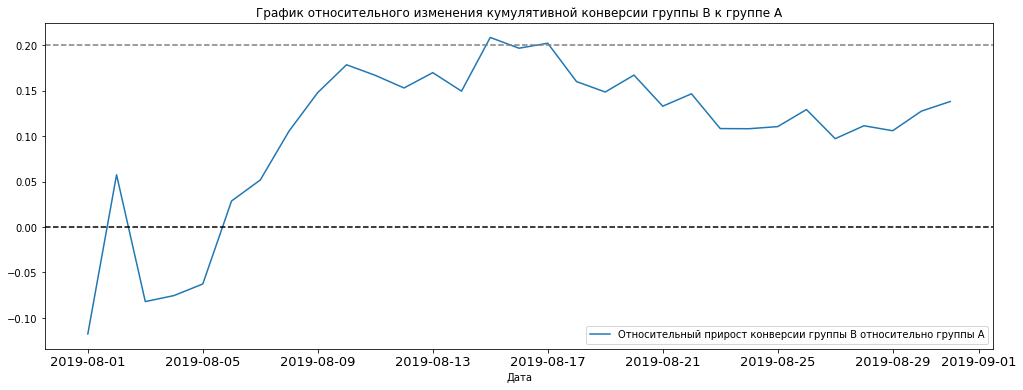

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(17, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.tick_params(axis='x', which='major', labelsize=13)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')

В начале теста группа В в основном проигрывала группе А, но с 6 августа окончательно вырвалась вперед. С 8 августа прирост колебался от 10 до 20%, постепенно снижаясь к концу месяца.

###### Создание точечного графика количества заказов по пользователям

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0, 0.5, 'Количество заказов')

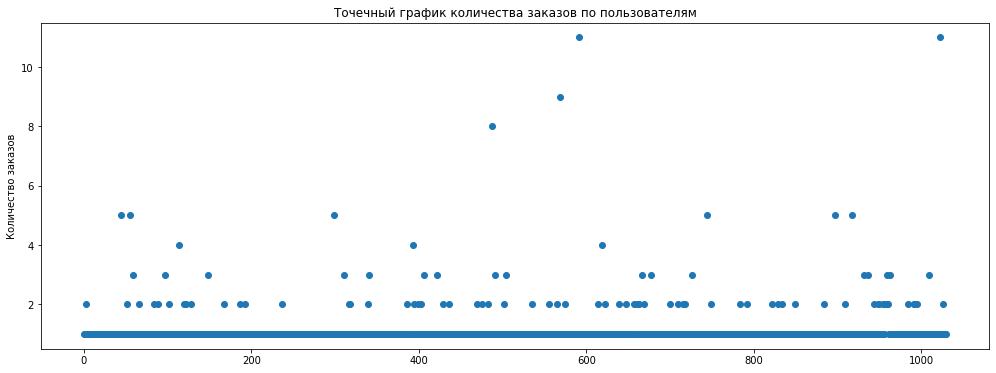

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(17, 6))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

Пользователей, которые сделали более двух заказов, крайне мало. Есть определенное количество пользователей, которые сделали два заказа. Но для того, чтобы оценить, насколько много это, необходимо посчитать выборочные перцентили.

###### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше 4 заказов. Целесообразно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

###### Создание точечныого графика стоимостей заказов

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


Text(0, 0.5, 'Стоимость заказа в млн ед.')

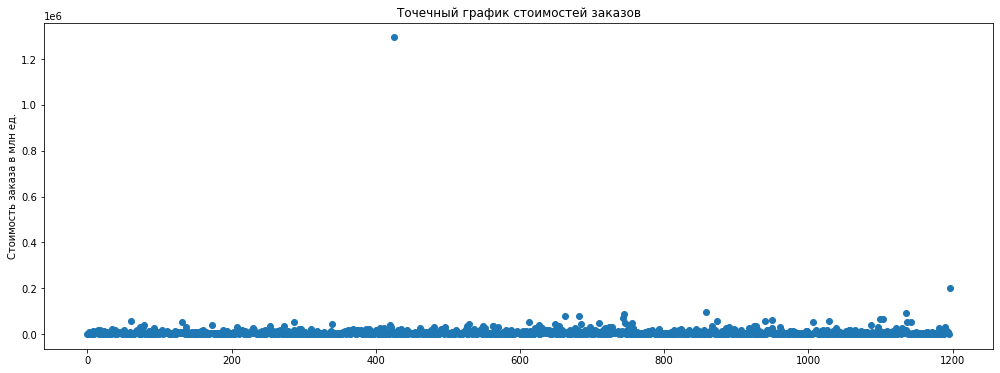

In [25]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

plt.figure(figsize=(17, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн ед.')

На графике зафиксирован самый крупный заказ на сумму 1 294 500 ед. Данный заказ является крайне аномальным в сравнении с другими заказами. Далее виден заказ в размере 202 740 ед. Все остальные заказы ниже 93 940 ед.

###### Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% пользователей чек дороже 28 тыс. ед. Не больше, чем у 1% - дороже 58 233,2 ед. Границей для определения аномальных заказов следует обозначить 28 тыс. ед.

###### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Нулевая гипотеза: различий в конверсии между группами нет.

Альтернативная гипотеза: различия в конверсии между группами есть.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Отлично!✅:</b> Гипотезы сформулированы верно!
</div>

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('Значение P-value : '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Oтносительное различие между сегментами : '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение P-value : 0.01679
Oтносительное различие между сегментами : 0.138


Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

###### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [28]:
print('Значение P-value : ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Oтносительное различие между сегментами : ''{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

Значение P-value : 0.729
Oтносительное различие между сегментами : 0.259


P-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами - 25,9%.

###### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

In [29]:
# срезы пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# срезы пользователей
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Значение P-value : ''{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Oтносительное различие между сегментами : ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение P-value : 0.01304
Oтносительное различие между сегментами : 0.173


За аномальных пользователей были приняты те, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 ед. Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем. Сегмент В оказался лучше по конверсии на 17,3%, еще лучше, чем до "очистки" данных.

###### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [31]:
print('Значение P-value : '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Oтносительное различие между сегментами : '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value : 0.738
Oтносительное различие между сегментами : -0.020


P-value оказался примерно на том же уровне - 0,738, как и с сырыми данными, т.е. нулевую гипотезу мы не можем отвергнуть. А вот средний чек у сегмента В снизился настолько, что сегмент А стал превосходить В, но всего лишь на 2%. После "очистки" данных, удаления выбросов разница в среднем чеке между двумя группами сократилась до минимума.

##### Вывод:
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.

График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий.

По итогам теста выявлено статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, а вот статистически значимых различий по среднему чеку не были зафиксированы в обоих случаях.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В, результаты по конверсии которой оказались лучше группы А на 13,8% и 17,3% до и после "очистки" данных соответственно.